# 서울시 공유자전거 '따릉이' 수요 예측 프로젝트
## 단계1. 데이터 전처리

## 0.프로젝트 소개

### (1) 수행 목표 
여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

#### 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

    * 1.데이터를 탐색하며 정보 획득
        * 날씨 데이터와 서울시 공유 자전거 따릉이의 수요 데이터를 제공해드렸습니다. 
        * 우리는 따릉이의 수요와 날씨간 어떤 연관성이 있는지 탐색 해 봅시다.
    * 2.EDA
        * 주어진 데이터의 변수들을 분석해 봅시다. 


### (2) 데이터 소개

#### 1) 기본 데이터

        * 학습데이터 : sbikedata.csv

#### 2) 데이터셋의 변수 소개

        * date : 날짜
        * hour : 시간
        * temperature : 온도
        * precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
        * windspeed : 풍속(평균)
        * humidity : 습도
        * visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
        * ozone : 오존 수치
        * PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
        * PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
        * count : 시간에 따른 따릉이 대여 수


## 1.환경설정

* 세부 요구사항
    - 경로 설정 
        * 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정 및 라이브러리 로딩
* 이번 프로젝트는 로컬환경에서 진행합니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [443]:
path = 'C:/Users/User/Mini_Project_1/1-2'

#### 2) 라이브러리 로딩

In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.

### (2) 데이터 불러오기
* 주어진 데이터셋
    * 따릉이 수요 및 날씨 데이터 : sbikedata.csv

#### 1) 데이터로딩

In [445]:
data = pd.read_csv(path+'/sbikedata.csv')

#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [446]:
data.head(5)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [447]:
data.tail(5)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


In [448]:
data.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
count,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
mean,11.506607,31.833705,15.633774,0.031634,19.376798,0.075511,2.237601,68.608718,1758.438648,215.117899
std,6.921963,42.650908,13.791083,0.018263,7.501572,0.264236,1.054516,17.277266,490.969394,185.972900
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.000000,60.000000,1.000000
25%,6.000000,16.000000,7.000000,0.019000,14.100000,0.000000,1.500000,56.000000,1935.500000,53.000000
50%,12.000000,25.000000,13.000000,0.030000,20.400000,0.000000,2.200000,70.000000,2000.000000,186.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.000000,2000.000000,315.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.000000,2000.000000,1746.000000


In [449]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5827 non-null   float64
 3   PM2.5          5827 non-null   float64
 4   ozone          5827 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


In [450]:
# 추기) date열을 datetime 형식으로 변환
data['date'] = pd.to_datetime(data['date'])

## 2.EDA 1단계 - 데이터 기본 탐색

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        1. 변수가 내포하고 있는 의미
        2. 변수가 수치형인지, 범주형인지
        3. 결측치 존재 여부 및 조치 방안
        4. 기초 통계량 확인
        5. 데이터 분포 확인
        6. 위 정보로부터 파악한 내용 정리
        7. 추가 분석사항 도출

### (1) 변수별 단변량 분석

#### 0) Feature0: date

변수가 내포하고 있는 의미
- 측정한 날짜 (기간: 2021.4 ~ 11 (8개월))

#### 1) Feature1 : hour

In [451]:
data['hour']

0        1
1        2
2        3
3        4
4        5
        ..
5822    20
5823    21
5824    22
5825    23
5826     0
Name: hour, Length: 5827, dtype: int64

변수가 내포하고 있는 의미
- 시간을 24시로 표현

변수가 수치형인지 범주형인지
- 시간은 범주형? 수치형?
    - → 수치형

변수의 결측치 존재 여부 및 조치방안

In [452]:
data[['hour']].isnull().sum()

hour    0
dtype: int64

변수의 기초 통계량 확인

In [453]:
data[['hour']].describe()

,hour
count,5827.000000
mean,11.506607
std,6.921963
min,0.000000
25%,6.000000
50%,12.000000
75%,18.000000
max,23.000000


In [454]:
data[['hour']].sort_values(by='hour').value_counts()

hour
0       243
1       243
22      243
21      243
20      243
19      243
18      243
17      243
16      243
15      243
14      243
13      243
12      243
11      243
10      243
9       243
8       243
7       243
5       243
23      243
6       242
3       242
2       242
4       241
Name: count, dtype: int64

변수의 분포 확인
* kdeplot 활용

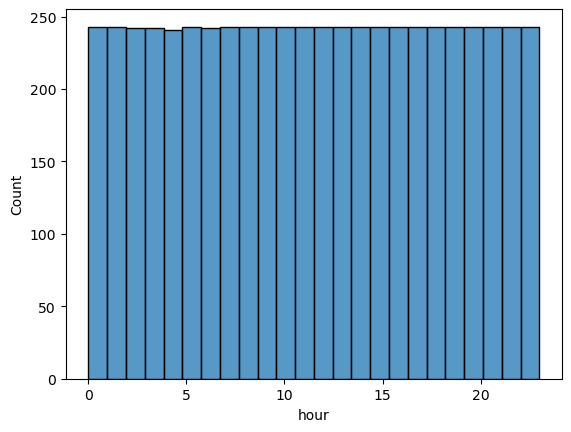

In [455]:
#sns.kdeplot(data['hour'])
sns.histplot(data['hour'], bins=24)
plt.show()

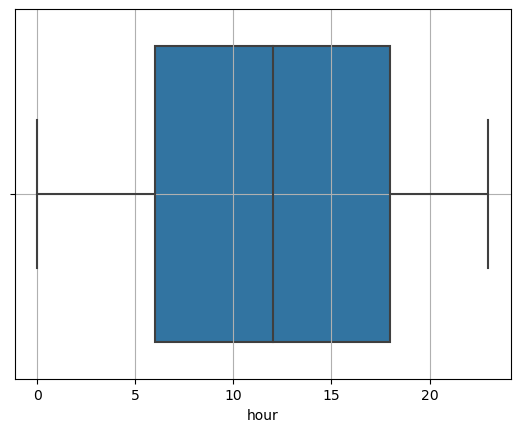

In [456]:
sns.boxplot(x=data['hour'])
plt.grid()
plt.show()

위 정보로 부터 파악한 내용 정리
- 데이터의 '시간' 열은 5827개 row로 구성되어있으며 결측치는 없음
- value_counts()로 빈도수를 살펴본 결과 모든 시간대에 대해 골고루 따릉이 대여 데이터가 있음을 알 수 있음!


#### 2) Feature2 : temperature

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 온도 (℃)

In [457]:
data['temperature']

0       13.1
1       12.4
2       13.1
3       13.0
4       13.0
        ... 
5822     9.3
5823     8.4
5824     8.6
5825     8.2
5826     7.9
Name: temperature, Length: 5827, dtype: float64

변수가 수치형인지 범주형인지
- 기온은 수치형? 범주형?
    - → 수치형

변수의 결측치 존재 여부 및 조치방안

In [458]:
data[['temperature']].isnull().sum()

temperature    0
dtype: int64

변수의 기초 통계량 확인

In [459]:
data[['temperature']].describe()

,temperature
count,5827.000000
mean,19.376798
std,7.501572
min,-3.500000
25%,14.100000
50%,20.400000
75%,24.900000
max,36.300000


변수의 분포 확인

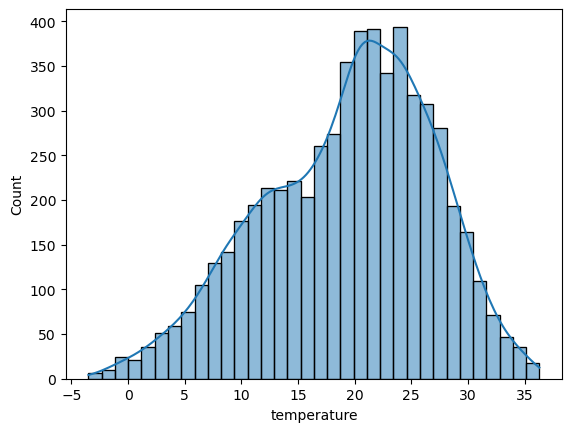

In [460]:
sns.histplot(data['temperature'], kde=True)
plt.show()

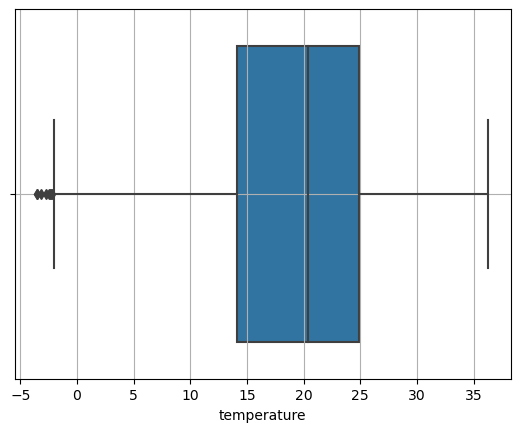

In [461]:
sns.boxplot(x=data['temperature'])
plt.grid()
plt.show()

위 정보로 부터 파악한 내용 정리
- 데이터의 '온도' 열은 5827개 row로 구성되어있으며 결측치는 없음
- multi-modal형 데이터이며 20도 초중반이 대부분

#### 3) Feature3 : precipitation

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 강우 여부 (비가 안왔으면 0, 왔으면 1)

In [462]:
data['precipitation']

0       0
1       0
2       0
3       0
4       0
       ..
5822    0
5823    0
5824    0
5825    0
5826    0
Name: precipitation, Length: 5827, dtype: int64

변수가 수치형인지 범주형인지
- 1시간 전 강우 유무는 범주형? 수치형?
    - → 범주형 (But! int형으로 되어 있음)

변수의 결측치 존재 여부 및 조치 방안


In [463]:
data['precipitation'].isnull().sum()

0

변수의 기초 통계량 확인

In [464]:
data['precipitation'].value_counts()

precipitation
0    5387
1     440
Name: count, dtype: int64

In [465]:
data['precipitation'].value_counts(normalize=True)

precipitation
0    0.924489
1    0.075511
Name: proportion, dtype: float64

변수의 분포 확인

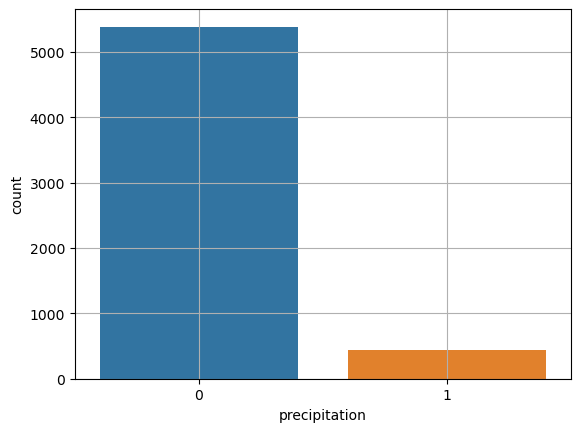

In [466]:
sns.countplot(x='precipitation', data=data)
plt.grid()
plt.show()

위 정보로 부터 파악한 내용 정리
- 비가 오지 않은 경우가 0.924%에 달함

#### 4) Feature4 : windspeed

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 평균 풍속, 풍량 (m/s)

In [467]:
data['windspeed']

0       1.4
1       2.1
2       3.4
3       3.1
4       2.9
       ... 
5822    0.3
5823    2.0
5824    1.9
5825    2.1
5826    2.3
Name: windspeed, Length: 5827, dtype: float64

변수가 수치형인지 범주형인지
- → 수치형

변수의 결측치 존재 여부 및 조치방안

In [468]:
data[['windspeed']].isnull().sum()

windspeed    0
dtype: int64

변수의 기초 통계량 확인

In [469]:
data[['windspeed']].describe()

,windspeed
count,5827.000000
mean,2.237601
std,1.054516
min,0.000000
25%,1.500000
50%,2.200000
75%,2.800000
max,8.300000


변수의 분포 확인

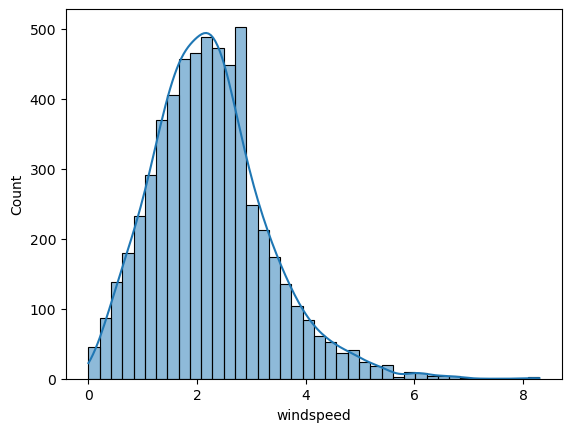

In [470]:
sns.histplot(data['windspeed'], kde=True, bins=40)
plt.show()

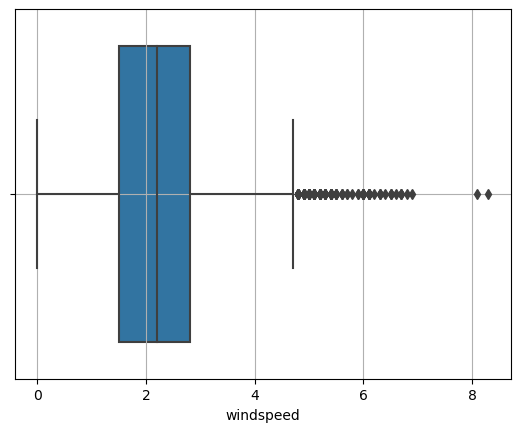

In [471]:
sns.boxplot(x=data['windspeed'])
plt.grid()
plt.show()

위 정보로 부터 파악한 내용 정리
- 평균 풍속이 4m/s 이하인 날들이 대부분
- 평균 풍속이 8m/s 이상인 날들은 태풍인가? 

#### 5) Feature5 : humidity

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 습도 (%)

In [472]:
data['humidity']

0       49
1       53
2       43
3       44
4       44
        ..
5822    66
5823    70
5824    70
5825    71
5826    71
Name: humidity, Length: 5827, dtype: int64

변수가 수치형인지 범주형인지
- → 수치형

변수의 결측치 존재 여부 및 조치방안

In [473]:
data[['humidity']].isnull().sum()

humidity    0
dtype: int64

변수의 기초 통계량 확인

In [474]:
data[['humidity']].describe()

,humidity
count,5827.000000
mean,68.608718
std,17.277266
min,19.000000
25%,56.000000
50%,70.000000
75%,82.000000
max,100.000000


변수의 분포 확인

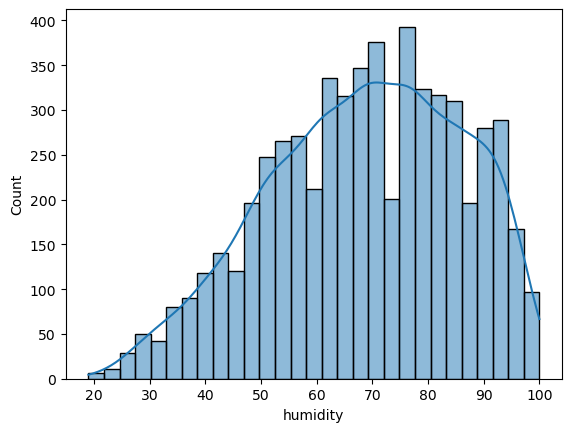

In [475]:
sns.histplot(data['humidity'], kde=True)
plt.show()

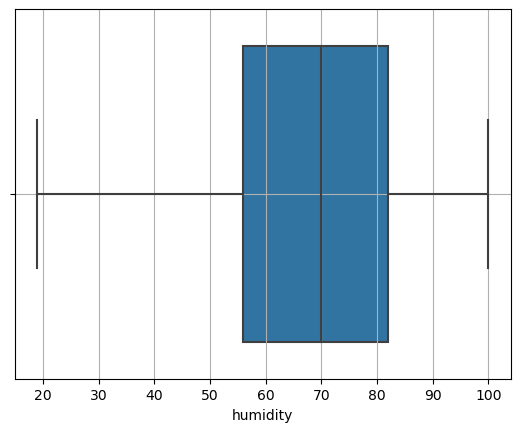

In [476]:
sns.boxplot(x=data['humidity'])
plt.grid()
plt.show()

위 정보로 부터 파악한 내용 정리
- 오른쪽으로 쏠린 모양의 정규분포 -> 건조한 겨울 제외한 4월~11월까지의 데이터이므로 습도가 높은 쪽에 몰려있는듯

#### 6) Feature6 : visibility

변수가 내포하고 있는 의미
- 대여 시점의 시계 (시정 거리) (10m)

In [477]:
data['visibility']

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
5822    1193
5823    1233
5824    1250
5825    1262
5826    1483
Name: visibility, Length: 5827, dtype: int64

변수가 수치형인지 범주형인지
- → 수치형

변수의 결측치 존재 여부 및 조치방안

In [478]:
data[['visibility']].isnull().sum()

visibility    0
dtype: int64

변수의 기초 통계량 확인

In [479]:
data[['visibility']].describe()

,visibility
count,5827.000000
mean,1758.438648
std,490.969394
min,60.000000
25%,1935.500000
50%,2000.000000
75%,2000.000000
max,2000.000000


변수의 분포 확인

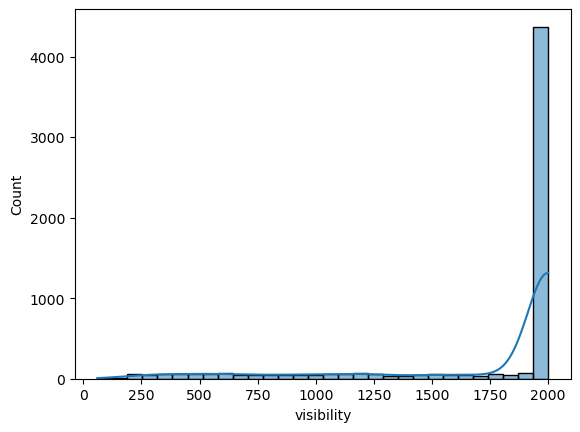

In [480]:
sns.histplot(data['visibility'], kde=True, bins=30)
plt.show()

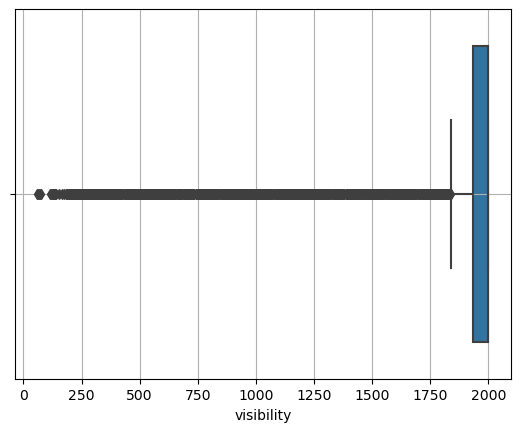

In [481]:
sns.boxplot(x=data['visibility'])
plt.grid()
plt.show()

위 정보로 부터 파악한 내용 정리
- 대부분의 값이 최대값인 20km → 맑은 날이 대부분일듯 -> 강우 여부가 거의 0이었던 것과 일맥상통

#### 7) Feature7 : ozone

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 오존 수치 (ppm)

In [482]:
data['ozone']

0       0.002
1       0.003
2       0.023
3       0.028
4       0.008
        ...  
5822    0.002
5823    0.002
5824    0.002
5825    0.001
5826    0.004
Name: ozone, Length: 5827, dtype: float64

변수가 수치형인지 범주형인지
- → 수치형

변수의 결측치 존재 여부 및 조치방안
- 128개 존재 O

In [483]:
data[['ozone']].isnull().sum()

ozone    0
dtype: int64

만약 결측치가 존재한다면?-> 어떻게 처리할 것인가?
- 아래의 plot을 보면 오존은 시간대 별로 어느정도 유의미한 차이를 보이므로 전날과 다음날의 같은 시간대의 오존 데이터를 보간하면 되지 않을까?

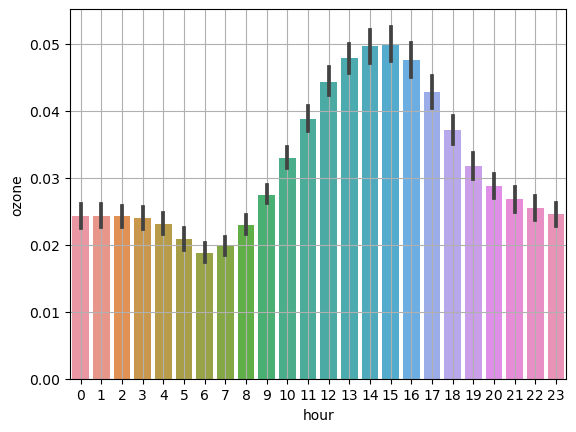

In [484]:
sns.barplot(x="hour", y="ozone", data=data)
plt.grid()
plt.show()

In [520]:
# 보간법으로 결측치 채우기 (TODO)
data['ozone'] = data['ozone'].interpolate(method='time')

변수의 기초 통계량 확인

In [487]:
data[['ozone']].describe()

,ozone
count,5827.000000
mean,0.031634
std,0.018263
min,0.001000
25%,0.019000
50%,0.030000
75%,0.041000
max,0.137000


변수의 분포 확인

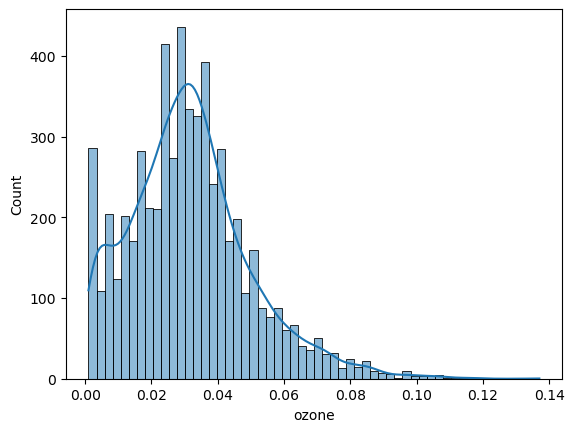

In [490]:
sns.histplot(data['ozone'], kde=True)
plt.show()

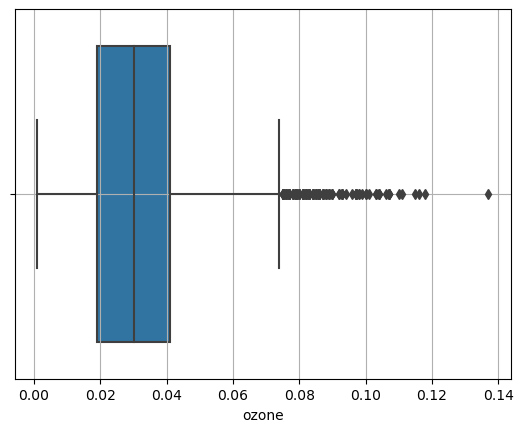

In [491]:
sns.boxplot(x=data['ozone'])
plt.grid()
plt.show()

위 정보로 부터 파악한 내용 정리
- 평균을 0.0318ppm으로 하는 정규분포를 띠지만 오존 수치가 0.00에 근접한 데이터도 꽤 위치함을 알 수 있음 -> multi-modal형

#### 8) Feature8 : PM10

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 미세먼지 농도 (㎍/㎡)

In [492]:
data['PM10']

date
2021-04-01    42.0
2021-04-01    41.0
2021-04-01    30.0
2021-04-01    27.0
2021-04-01    29.0
              ... 
2021-11-29    74.0
2021-11-29    65.0
2021-11-29    51.0
2021-11-29    43.0
2021-11-30    39.0
Name: PM10, Length: 5827, dtype: float64

변수가 수치형인지 범주형인지
- → 수치형

변수의 결측치 존재 여부 및 조치방안
- 102개 존재
- 아래의 plot을 보면 시간대 별로 PM 10 농도는 별 차이가 없음을 알 수 있음 → 해당 날짜의 이전 시간과 다음 시간의 데이터를 보간하면 되지 않을까?

In [493]:
data[['PM10']].isnull().sum()

PM10    0
dtype: int64

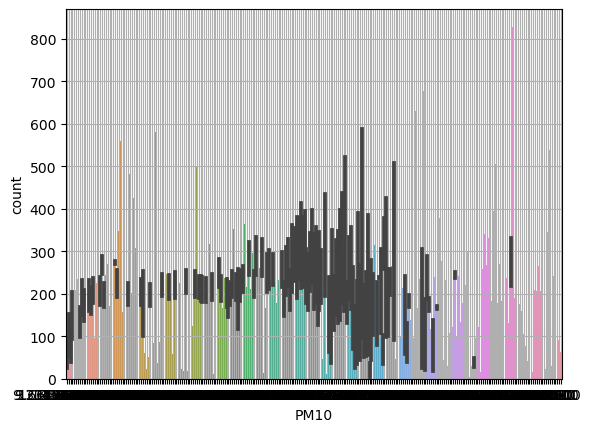

In [516]:
sns.barplot(x="PM10", y="count", data=data)
plt.grid()
plt.show()

변수의 기초 통계량 확인

In [517]:
# 보간법으로 결측치 채우기
data['PM10'] = data['PM10'].interpolate(method='linear')

In [518]:
data[['PM10']].describe()

,PM10
count,5827.000000
mean,31.833705
std,42.650908
min,3.000000
25%,16.000000
50%,25.000000
75%,37.000000
max,827.000000


변수의 분포 확인

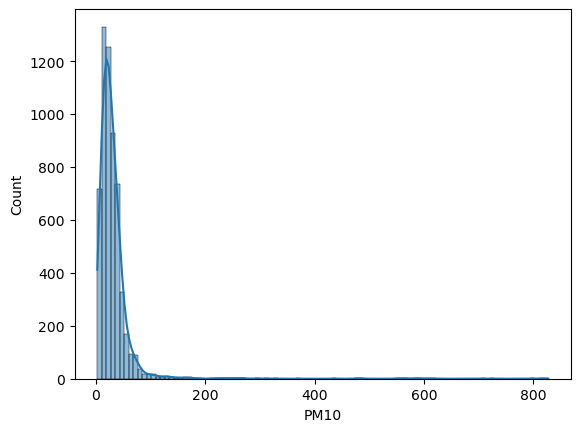

In [519]:
sns.histplot(data['PM10'], kde=True, bins=100)
#sns.kdeplot(data['PM10'])
plt.show()

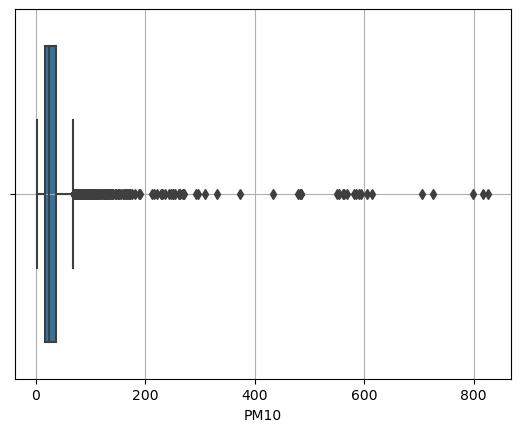

In [498]:
sns.boxplot(x=data['PM10'])
plt.grid()
plt.show()

위 정보로 부터 파악한 내용 정리
- 왼쪽으로 치우친 정규분포
- 대부분의 값이 0-40㎍/㎡ 이내로 존재

-> 그 사이의 값만 봐보자

In [499]:
temp = data.loc[data['PM10']<=40]
temp.shape

(4683, 10)

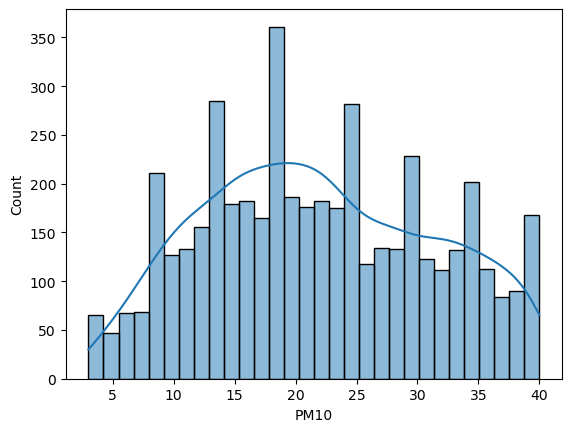

In [500]:
sns.histplot(temp['PM10'], kde=True, bins=30)
#sns.kdeplot(data['PM10'])
plt.show()

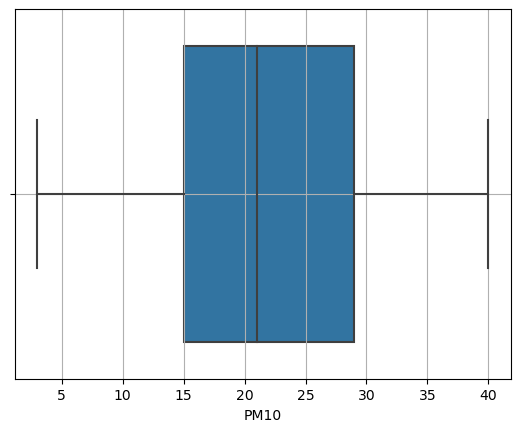

In [501]:
sns.boxplot(x=temp['PM10'])
plt.grid()
plt.show()

#### 9) Feature9 : PM2.5

변수가 내포하고 있는 의미
- 따릉이 대여시점의 초미세먼지 수치 (㎍/㎡)

In [502]:
data['PM2.5']

date
2021-04-01    21.0
2021-04-01    21.0
2021-04-01    13.0
2021-04-01    12.0
2021-04-01    14.0
              ... 
2021-11-29    58.0
2021-11-29    56.0
2021-11-29    41.0
2021-11-29    35.0
2021-11-30    31.0
Name: PM2.5, Length: 5827, dtype: float64

변수가 수치형인지 범주형인지
- → 수치형

In [503]:
data[['PM2.5']].isnull().sum()

PM2.5    0
dtype: int64

변수의 결측치 존재 여부 및 조치방안
- 95개 존재
- 아래의 plot을 보면 시간대 별로 PM 2.5 농도는 별 차이가 없음을 알 수 있음 → 해당 날짜의 이전 시간과 다음 시간의 데이터를 보간하면 되지 않을까?

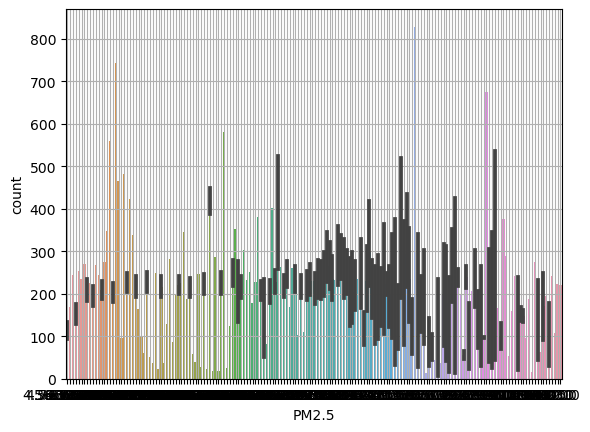

In [515]:
sns.barplot(x="PM2.5", y="count", data=data)
plt.grid()
plt.show()

In [505]:
# 보간법으로 결측치 채우기
data['PM2.5'] = data['PM2.5'].interpolate(method='linear')

변수의 기초 통계량 확인

In [506]:
data[['PM2.5']].describe()

,PM2.5
count,5827.000000
mean,15.633774
std,13.791083
min,1.000000
25%,7.000000
50%,13.000000
75%,20.000000
max,125.000000


변수의 분포 확인

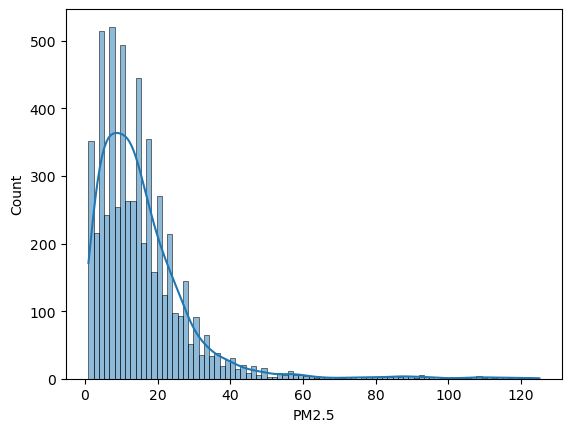

In [507]:
sns.histplot(data['PM2.5'], kde=True)
plt.show()

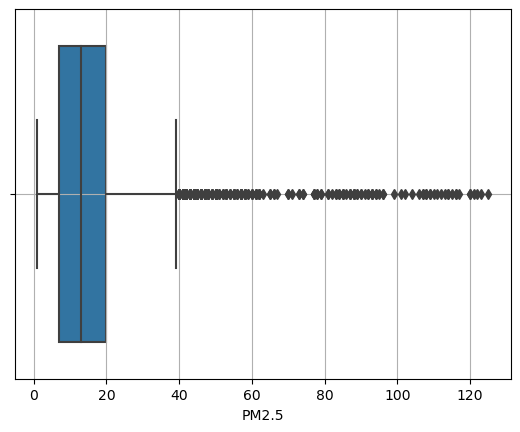

In [508]:
sns.boxplot(x=data['PM2.5'])
plt.grid()
plt.show()

위 정보로 부터 파악한 내용 정리
- 왼쪽으로 치우친 정규분포
- 대부분의 값이 0-40㎍/㎡ 이내로 존재

-> 그 사이의 값만 봐보자

In [509]:
temp = data.loc[data['PM2.5']<=40]
temp.shape

(5601, 10)

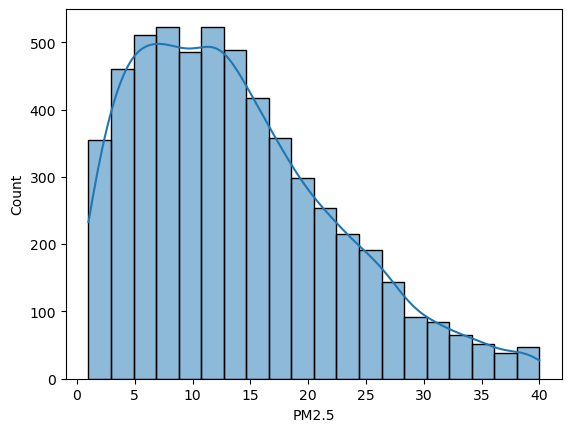

In [510]:
sns.histplot(temp['PM2.5'], kde=True, bins=20)
#sns.kdeplot(data['PM2.5'])
plt.show()

#### 10) Count (Target)

In [511]:
data['count']

date
2021-04-01     46
2021-04-01     40
2021-04-01     31
2021-04-01     12
2021-04-01     30
             ... 
2021-11-29    273
2021-11-29    228
2021-11-29    215
2021-11-29    125
2021-11-30     95
Name: count, Length: 5827, dtype: int64

변수가 내포하고 있는 의미
- 따릉이의 대여량 -> 우리가 예측해야 할 변수!

변수가 수치형인지 범주형인지
- → 수치형

변수의 결측치 존재 여부 및 조치 방안

In [512]:
data[['count']].isnull().sum()

count    0
dtype: int64

변수의 기초 통계량 확인

In [513]:
data[['count']].describe()

,count
count,5827.000000
mean,215.117899
std,185.972900
min,1.000000
25%,53.000000
50%,186.000000
75%,315.000000
max,1746.000000


변수의 분포 확인

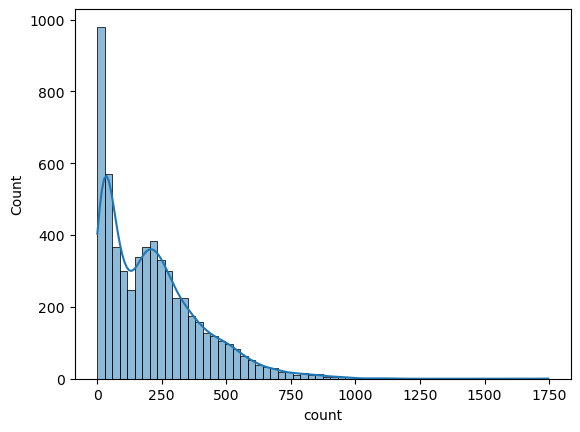

In [424]:
sns.histplot(data['count'], kde=True)
plt.show()

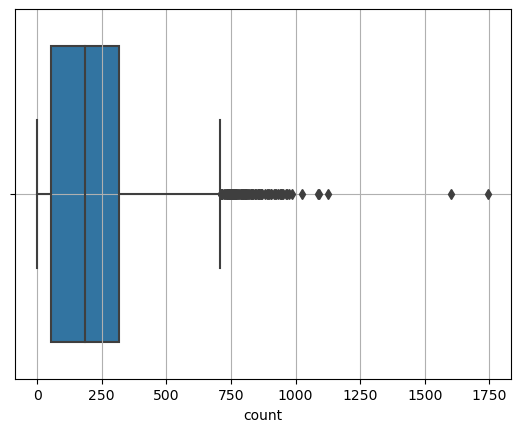

In [425]:
sns.boxplot(x=data['count'])
plt.grid()
plt.show()

위 정보로 부터 파악한 내용 정리
- 125대인 데이터들은 왜 적을까?
- 우측에 따릉이 대여 수가 1500대 이상인 시간들 일부 존재 → 무슨 일 있었길래 그렇게 많이 빌렸을까?

In [427]:
data.to_csv('sbikedata.csv', index=False)